In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cross_decomposition import CCA

In [2]:
link2data = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(link2data)
df =df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [3]:
X = df[['bill_length_mm', 'bill_depth_mm']]
X.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


In [4]:
#normalize
X_nm = (X-X.mean()) / X.std()
X_nm.head()

,bill_length_mm,bill_depth_mm
0,-0.894695,0.779559
1,-0.821552,0.119404
2,-0.675264,0.424091
4,-1.333559,1.084246
5,-0.858123,1.744400


In [5]:
Y = df[['flipper_length_mm', 'body_mass_g']]
Y.head()

,flipper_length_mm,body_mass_g
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
4,193.0,3450.0
5,190.0,3650.0


In [7]:
#normalize
Y_nm = (Y - Y.mean()) / Y.std()
Y_nm.head()

,flipper_length_mm,body_mass_g
0,-1.424608,-0.567621
1,-1.067867,-0.505525
2,-0.425733,-1.188572
4,-0.568429,-0.940192
5,-0.782474,-0.691811


In [10]:
cca = CCA(n_components = 2)
cca.fit(X_nm, Y_nm)

#X_c: Canonical Variables of X, Y_c: Canonical Variables of Y
X_c, Y_c = cca.transform(X_nm, Y_nm)

In [12]:
X_c[:5]

array([[-1.18625232, -0.01036701],
       [-0.70957262, -0.4560358 ],
       [-0.79073194, -0.13080943],
       [-1.7186634 , -0.07362316],
       [-1.77229457,  0.73624799]])

In [13]:
Y_c[:5]

array([[-1.40879506,  0.68286617],
       [-1.05385671,  0.42987851],
       [-0.3935502 , -0.83961988],
       [-0.5428878 , -0.45857086],
       [-0.76354771, -0.01420367]])

#### Understanding the results from CCA

In [14]:
x_weights = pd.DataFrame(cca.x_weights_, columns = ['v1', 'v2'], index = ['bill_length_mm', 'bill_depth_mm'])
x_weights

,v1,v2
bill_length_mm,0.771171,0.636628
bill_depth_mm,-0.636628,0.771171


In [15]:
y_weights = pd.DataFrame(cca.y_weights_, columns = ['w1', 'w2'], index = ['flipper_length_mm', 'bill_mass_g'])
y_weights

,w1,w2
flipper_length_mm,0.999637,0.026946
bill_mass_g,-0.026946,0.999637


In [19]:
## X canonical loading matrix
x_loadings = pd.DataFrame(cca.x_loadings_, columns = ['v1', 'v2'], index = ['bill_length_mm', 'bill_depth_mm'])
x_loadings

,v1,v2
bill_length_mm,0.748657,0.636628
bill_depth_mm,-0.663901,0.771171


In [20]:
## Y canonical loading matrix
y_loadings = pd.DataFrame(cca.y_loadings_, columns = ['v1', 'v2'], index = ['flipper_length_mm', 'bill_mass_g'])
y_loadings

,v1,v2
flipper_length_mm,1.024286,0.026946
bill_mass_g,0.887453,0.999637


In [21]:
cc_res = pd.DataFrame({"CCX_1":X_c[:, 0],
                       "CCY_1":Y_c[:, 0],
                       "CCX_2":X_c[:, 1],
                       "CCY_2":Y_c[:, 1],
                       "Species":df.species.tolist(),
                      "Island":df.island.tolist(),
                      "sex":df.sex.tolist()})

In [25]:
import numpy as np
# 첫번째 canonical 변수 간의 상관관계
np.corrcoef(X_c[:, 0], Y_c[:, 0])

array([[1.        , 0.78763151],
       [0.78763151, 1.        ]])

In [26]:
# 두번째 canonical 변수 간의 상관관계
np.corrcoef(X_c[:, 1], Y_c[:, 1])

array([[1.        , 0.08638695],
       [0.08638695, 1.        ]])

Text(0.5, 1.0, 'Comp. 1, corr = 0.79')

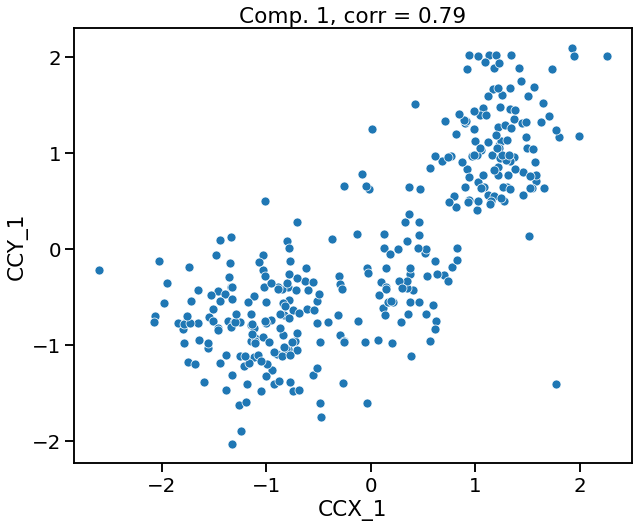

In [27]:
sns.set_context("talk", font_scale=1.2)
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1",
                y="CCY_1", 
                data=cc_res)
plt.title('Comp. 1, corr = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

<AxesSubplot:xlabel='Species', ylabel='CCX_1'>

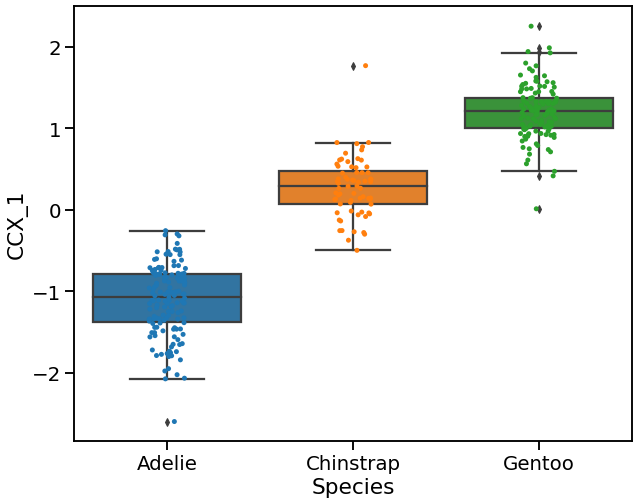

In [30]:
# 사실 주어진 dataset에는 X, Y 집단의 변수 뿐만 아니라 hidden variable들이 존재한다. (ex. species, island, sex)
# box plot을 뽑아보니 CCX_1이 hidden valriable을 굉장히 잘 설명해주고 있다

plt.figure(figsize=(10,8))
sns.boxplot(x="Species",
                y="CCX_1", 
               data=cc_res)
sns.stripplot(x="Species",
                y="CCX_1", 
                 data=cc_res)

<AxesSubplot:xlabel='Species', ylabel='CCY_1'>

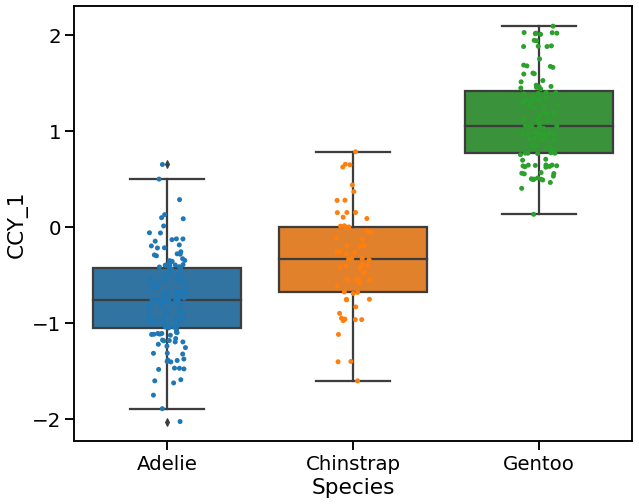

In [29]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Species",
                y="CCY_1", 
                 data=cc_res)
sns.stripplot(x="Species",
                y="CCY_1", 
                 data=cc_res)

Text(0.5, 1.0, 'First Pair of Canonical Covariate, corr = 0.79')

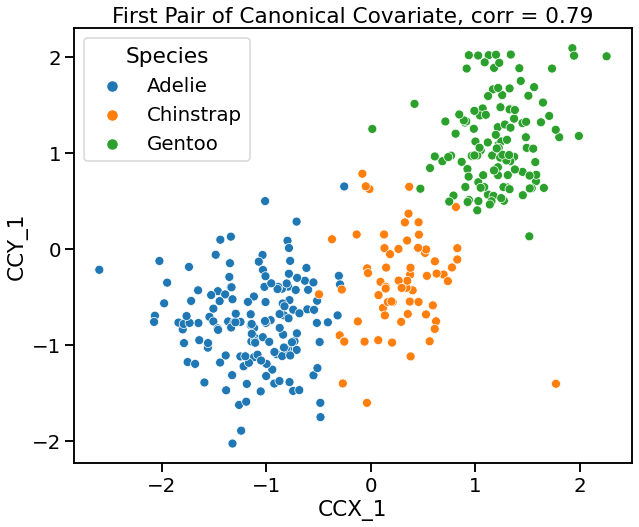

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_1",
                y="CCY_1", 
                hue="Species", data=cc_res)
plt.title('First Pair of Canonical Covariate, corr = %.2f' %
         np.corrcoef(X_c[:, 0], Y_c[:, 0])[0, 1])

In [32]:
ccX_df = pd.DataFrame({"CCX_1":X_c[:, 0],
                       "CCX_2":X_c[:, 1],
                       "Species":df.species.astype('category').cat.codes,
                      "Island":df.island.astype('category').cat.codes,
                      "sex":df.sex.astype('category').cat.codes,
                       "bill_length":X_nm.bill_length_mm,
                      "bill_depth":X_nm.bill_depth_mm})
corr_X_df= ccX_df.corr(method='pearson') 
corr_X_df.head()

,CCX_1,CCX_2,Species,Island,sex,bill_length,bill_depth
CCX_1,1.000000e+00,3.453916e-16,0.935057,-0.561781,0.025383,0.828437,-0.734650
CCX_2,3.453916e-16,1.000000e+00,-0.078719,0.228933,0.576790,0.560082,0.678447
Species,9.350575e-01,-7.871884e-02,1.000000,-0.622428,0.010964,0.730548,-0.740346
Island,-5.617810e-01,2.289327e-01,-0.622428,1.000000,-0.012435,-0.337179,0.568031
sex,2.538332e-02,5.767897e-01,0.010964,-0.012435,1.000000,0.344078,0.372673


C:\Users\user\AppData\Local\Temp/ipykernel_6924/1637750891.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_df_lt = corr_X_df.where(np.tril(np.ones(corr_X_df.shape)).astype(np.bool))


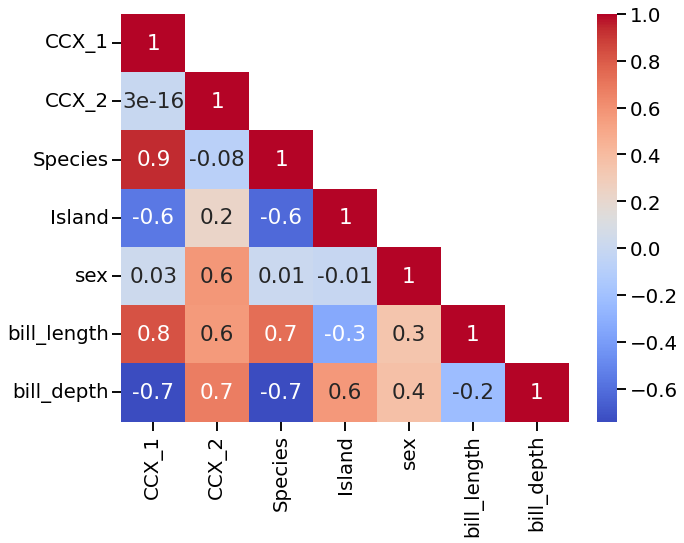

In [33]:
plt.figure(figsize=(10,8))
X_df_lt = corr_X_df.where(np.tril(np.ones(corr_X_df.shape)).astype(np.bool))
sns.heatmap(X_df_lt,cmap="coolwarm",annot=True,fmt='.1g')
plt.tight_layout()
plt.savefig("Heatmap_Canonical_Correlates_from_X_and_data.jpg",
                    format='jpeg',
                    dpi=100)

C:\Users\user\AppData\Local\Temp/ipykernel_6924/808930853.py:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_df_lt = corr_Y_df.where(np.tril(np.ones(corr_Y_df.shape)).astype(np.bool))


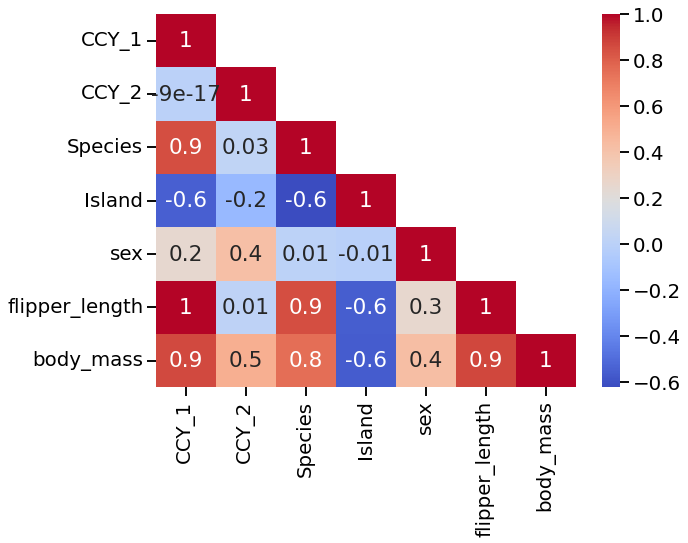

In [35]:
# second pair of canonical covariates with the dataset 
ccY_df = pd.DataFrame({"CCY_1":Y_c[:, 0],
                       "CCY_2":Y_c[:, 1],
                       "Species":df.species.astype('category').cat.codes,
                      "Island":df.island.astype('category').cat.codes,
                      "sex":df.sex.astype('category').cat.codes,
                       "flipper_length":Y_nm.flipper_length_mm,
                      "body_mass":Y_nm.body_mass_g})
 
# compute correlation with Pandas corr()
corr_Y_df= ccY_df.corr(method='pearson') 
 
# Get lower triangular correlation matrix
Y_df_lt = corr_Y_df.where(np.tril(np.ones(corr_Y_df.shape)).astype(np.bool))
 
# make a lower triangular correlation heatmap with Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(Y_df_lt,cmap="coolwarm",annot=True,fmt='.1g')
plt.tight_layout()
plt.savefig("Heatmap_Canonical_Correlates_from_Y_and_data.jpg",
                    format='jpeg',
                    dpi=100)

Text(0.5, 1.0, 'Second Pair of Canonical Covariate, corr = 0.09')

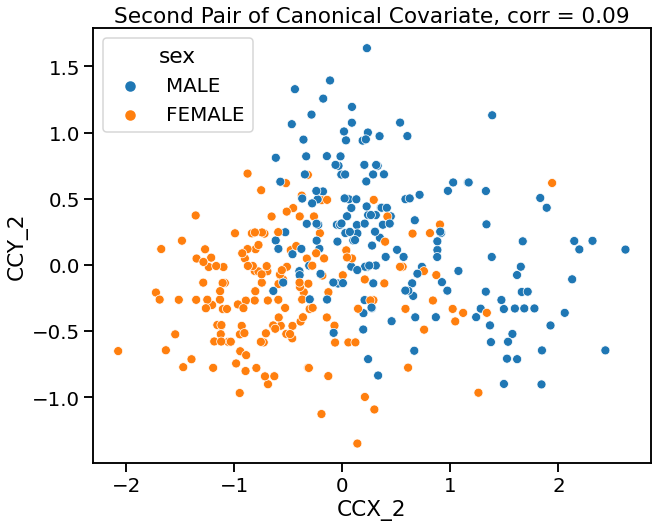

In [36]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="CCX_2",
                y="CCY_2", 
                hue="sex", data=cc_res)
plt.title('Second Pair of Canonical Covariate, corr = %.2f' %
         np.corrcoef(X_c[:, 1], Y_c[:, 1])[0, 1])